In [1]:
from moviepy.editor import *
from VideoHandler import VideoHandler
import os
import seaborn as sns
import matplotlib.pyplot as plt
import random

methods = ['mif_beginning', 'mif_center', 'mif_end', 'max_probability', 'max_minimum']

base_path = '../videos_processed'

def frame_to_sec(frame, fps):
    frame_duration = 1 / fps
    return frame * frame_duration

In [2]:
def show_clip(path):
    clips = []
    for s in segments:
        (start, end) = s
        clips.append(VideoFileClip(path).subclip(frame_to_sec(start, fps), frame_to_sec(end, fps)))
    final_clip = clips_array([clips])
    return final_clip

In [27]:
category = random.choice(os.listdir(base_path))
filename = random.choice(os.listdir(f'{base_path}/{category}'))
path = f'{base_path}/{category}/{filename}'

#path =  '../videos_processed/arresting/yt-AjdbE8lIzAY_218.mp4'
#path =  '../videos_processed/arresting/yt-vBDMIuOVru4_151.mp4'
from video_converter import get_frame_count, get_video_info

#print(os.getcwd())

handler = VideoHandler.from_path(path)

fps = round(handler.get_fps())

segment_length = 1 * fps

In [28]:
segments = []
for m in methods:
        (start, end) = handler.get_segment(segment_length, method=m)
        segments.append((start, end))

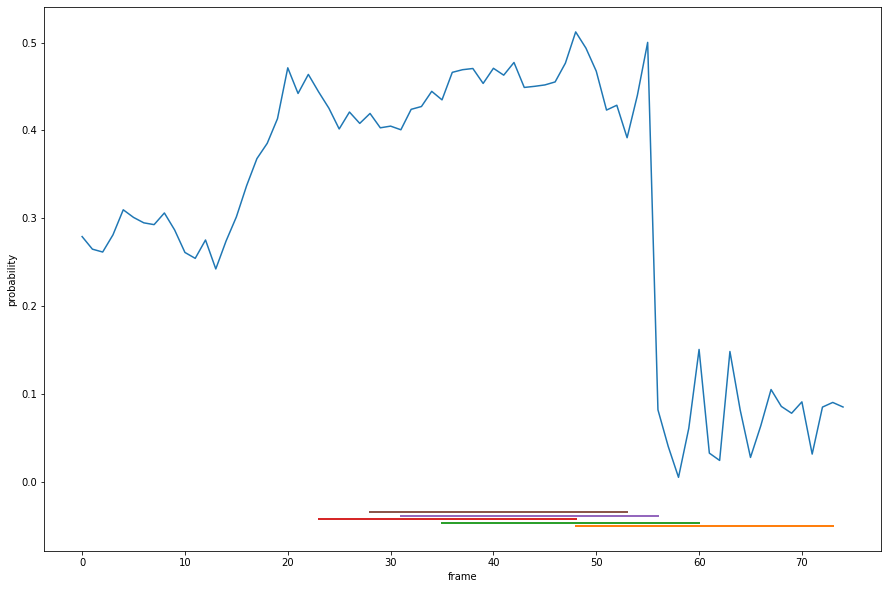

In [29]:
df_accuracy = handler.get_accuracy_curve()

plt.figure(figsize=(15, 10))

plt.ylim = 1

sns.lineplot(data=df_accuracy, x='frame', y='probability')

counter = -0.05

for s in segments:
    (start, end) = s
    plt.plot([start, end], [counter, counter], linewidth=2)
    counter += 0.004

plt.show()

In [30]:
print(path)
print(category)
print(methods)
show_clip(path).ipython_display(width=240 * len(methods), autoplay=1, loop=0)

../videos_processed/queuing/yt-ZPRkoZyAmfg_23.mp4
queuing
['mif_beginning', 'mif_center', 'mif_end', 'max_probability', 'max_minimum']


t:   0%|          | 0/26 [00:00<?, ?it/s, now=None]

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4
